In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Importing some basic data analysis and visualization Python libraries.

### EXPLORATORY DATA ANALYSIS
First we load our dataset and store it in pandas dataframe.<br>
Here, we can observe different columns. Most of them have continuous values whereas some columns like target, cp, restecg, fbs, exang, slope, ca, thal look like they have categorical values.<br>
One of the earliest things that can be observed are the unusual column names that don't give our much information. So, we renamed the columns so that they give out better information with reference to the source of the dataset(https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.rename(columns ={'cp':'chest_pain_type','trestbps':'rest_blood_pressure','chol':'cholesterol','fbs':'fasting_blood_sugar',
                    'restecg':'results_ecg','thalach':'maximum_heart_rate','exang':'exercise_induced_angina',
                    'oldpeak':'st_depression','ca':'major_vessels','thal':'thalassemia_types','target':'heart_complications',
                    'slope':'st_slope'}, inplace = True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   rest_blood_pressure      303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   results_ecg              303 non-null    int64  
 7   maximum_heart_rate       303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  major_vessels            303 non-null    int64  
 12  thalassemia_types        303 non-null    int64  
 13  heart_complications      303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [6]:
data.head()

,age,sex,chest_pain_type,rest_blood_pressure,cholesterol,fasting_blood_sugar,results_ecg,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia_types,heart_complications
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We use the .info() method of DataFrame to take a more detailed look into our columns. Here, it can be seen that all the columns have numeric datatypes and there are no rows with null values. So, there is no need to imputate the data.

### Data Visualization

**Scatterplots**

Minimum: 29
Maximum: 77


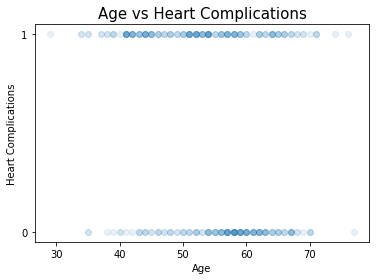

Minimum: 0
Maximum: 1


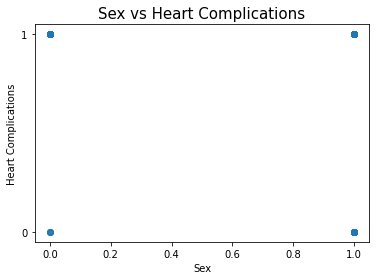

Minimum: 0
Maximum: 3


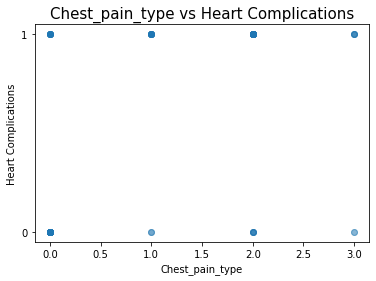

Minimum: 94
Maximum: 200


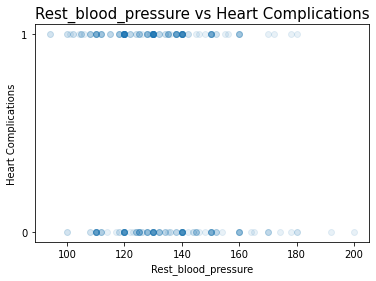

Minimum: 126
Maximum: 564


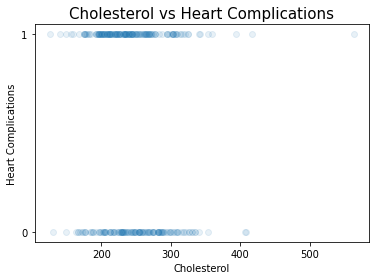

Minimum: 0
Maximum: 1


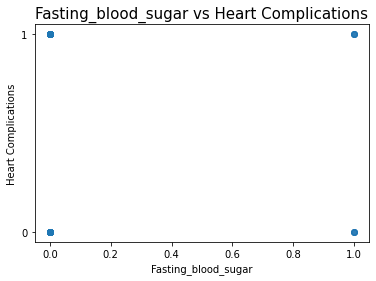

Minimum: 0
Maximum: 2


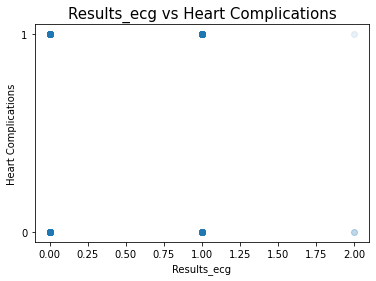

Minimum: 71
Maximum: 202


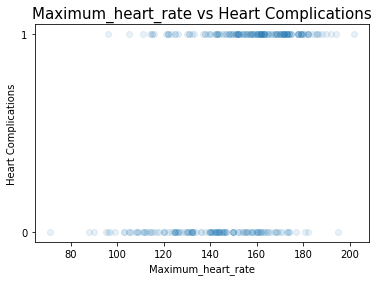

Minimum: 0
Maximum: 1


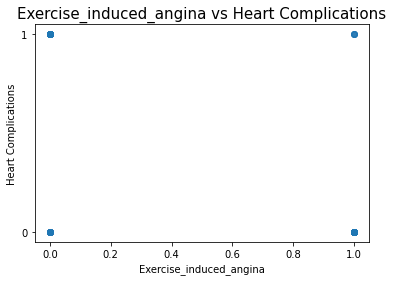

Minimum: 0.0
Maximum: 6.2


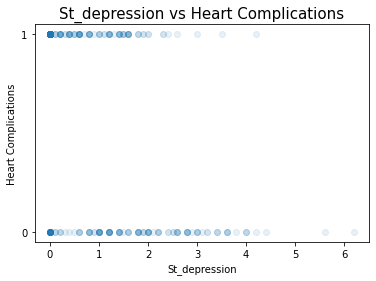

Minimum: 0
Maximum: 2


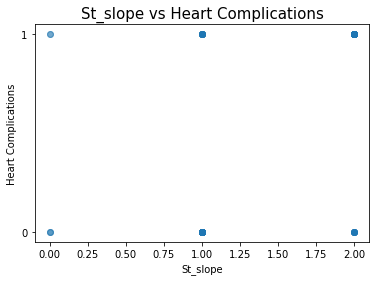

Minimum: 0
Maximum: 4


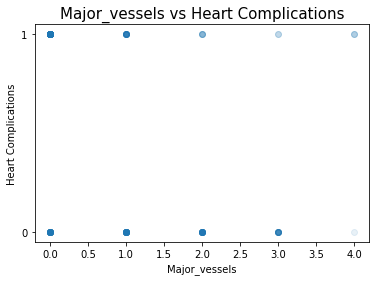

Minimum: 0
Maximum: 3


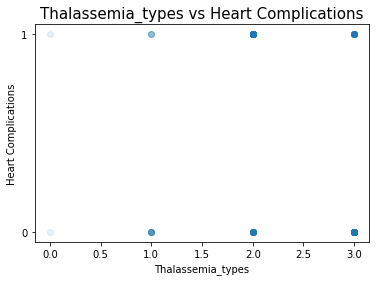

In [10]:
for i in data.columns.drop('heart_complications'):
  print(f"Minimum: {data[i].min()}")
  print(f"Maximum: {data[i].max()}")
  plt.scatter(x=data[i],y=data['heart_complications'],alpha=0.1)
  plt.title(f"{i.capitalize()} vs Heart Complications",fontsize=15)
  plt.xlabel(i.capitalize(),fontsize=10)
  plt.ylabel('Heart Complications',fontsize=10)
  plt.yticks([0,1])
  plt.show()

**Joinplots**

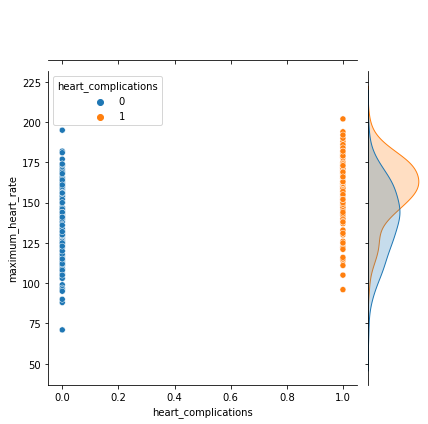

In [11]:
sns.jointplot(data=data, x="heart_complications", y="maximum_heart_rate", hue="heart_complications")

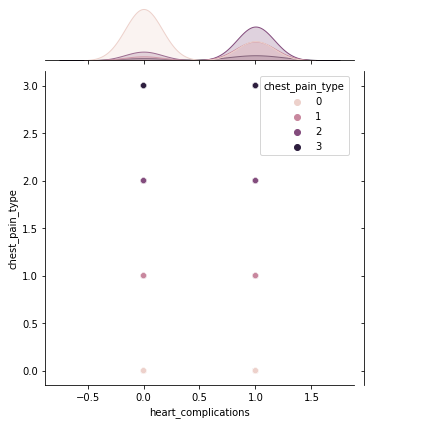

In [12]:
sns.jointplot(data=data, x="heart_complications", y="chest_pain_type", hue="chest_pain_type")

### Data Cleaning and ML Training

In [13]:
data.drop_duplicates(inplace=True) #Dropping the duplicates
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
rest_blood_pressure        0
cholesterol                0
fasting_blood_sugar        0
results_ecg                0
maximum_heart_rate         0
exercise_induced_angina    0
st_depression              0
st_slope                   0
major_vessels              0
thalassemia_types          0
heart_complications        0
dtype: int64

Since there are no null values in the dataset, no data imputation is required.

In [14]:
#Importing required modules to train the ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Importing some classificiation algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Since the target variable is categorical and the features are both continuous and categorical, the correlation check method should be regression test. So, let's set our data up for Regression test for feature selection.

In [15]:
#Preparing the vectors, splitting train and test data and scaling the features
X = data.drop('heart_complications',axis=1)
y = data['heart_complications']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=6)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

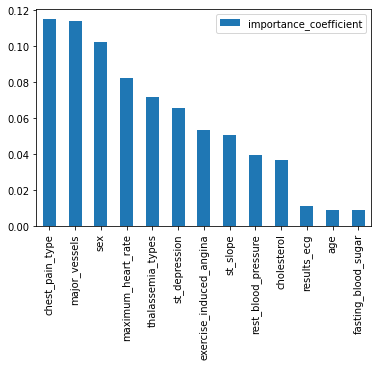

In [16]:
model = LinearRegression()
model.fit(X_train,Y_train)
importance_values = np.abs(model.coef_)
labels = data.columns.drop('heart_complications')
feature_selection = pd.DataFrame(np.abs(model.coef_), index=labels, columns=['importance_coefficient']).sort_values('importance_coefficient', ascending=False)
feature_selection.plot(kind='bar');

**Model Selection**<br>
Now, let's create a pipeline with some classification algorithms and select the best model.

In [17]:
pipelines = []
pipelines.append(('LogisticRegression', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('GradientBoostingClassifier', Pipeline([('Scaler', StandardScaler()),('GBC',GradientBoostingClassifier())])))
pipelines.append(('KNeighborsClassifier', Pipeline([('Scaler', StandardScaler()),('KNC',KNeighborsClassifier())])))
pipelines.append(('SVC', Pipeline([('Scaler', StandardScaler()),('SVC',LinearSVC())])))
pipelines.append(('DecisionTree', Pipeline([('Scaler', StandardScaler()),('DT',DecisionTreeClassifier())])))
pipelines.append(('RandomForestClassifier', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5, random_state=3,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.800886 (0.065098)
GradientBoostingClassifier: 0.772425 (0.066910)
KNeighborsClassifier: 0.781949 (0.055245)
SVC: 0.800775 (0.063600)
DecisionTree: 0.715504 (0.056908)
RandomForestClassifier: 0.791584 (0.076994)


Here, LogisticRegression and SVC are showing the best possible score for our dataset. So, lets take Logistic Regression and SVC and work on model accuracy improvement.

**Logistic Regression**<br>


In [19]:
model_1 = LogisticRegression()
model_1.fit(X_train,Y_train)
print("Logistic Regression\n")
print("Train Data: %f" % model_1.score(X_train,Y_train))
print("Test Data: %f" % model_1.score(X_test,Y_test))

Logistic Regression

Train Data: 0.824645
Test Data: 0.879121


Here, Logistic regression has good scores on both Train and Test data. So, there is no problem of overfitting.

**Support Vector Machine Classifier**

In [20]:
model_2 = LinearSVC()
model_2.fit(X_train,Y_train)
print("Support Vector Machine\n")
print("Train Data: %f" % model_2.score(X_train,Y_train))
print("Test Data: %f" % model_2.score(X_test,Y_test))

Support Vector Machine

Train Data: 0.829384
Test Data: 0.868132


Since SVM also performed pretty good and Logistic Regression has evidently slight better performance, we will use Logistic Regression to train our model.

**Tuning and Perfecting the Model**<br>
From the Regression test we conducted earlier, the features results_ecg , age,and fasting_blood_sugar seem to be less significant. So, lets try to train our model by dropping those columns.

In [21]:
X1 = data.drop(['results_ecg','age','fasting_blood_sugar','heart_complications'],axis=1)
Y1 = data['heart_complications']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.3,random_state=6)
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)

In [22]:
model_3 = LogisticRegression()
model_3.fit(X1_train,Y1_train)
print("Logistic Regression after dropping less significant features:\n")
print("Train Data: %f" % model_3.score(X1_train,Y1_train))
print("Test Data: %f" % model_3.score(X1_test,Y1_test))

Logistic Regression after dropping less significant features:

Train Data: 0.829384
Test Data: 0.879121


Our model has slightly improved. Now, lets tune the hyperparameters and create the final model.

In [23]:
final_model_test = LogisticRegression()
solvers = ['lbfgs', 'liblinear','newton-cg']
cvalues = [100, 50, 30, 20, 10, 1.0, 0.1, 0.01]
penalties = ['l1','l2','elasticnet','none']
grid = {'C': cvalues,
        'penalty': penalties,
        'solver': solvers,
        }
kfold = KFold(n_splits=5, random_state=3,shuffle=True)
grid_search = GridSearchCV(estimator=final_model_test, param_grid=grid, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X1_train, Y1_train)
print("Best Score: %f \n Best Params: %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score: 0.838760 
 Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [24]:
final_model = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
final_model.fit(X1_train,Y1_train)
final_model.score(X1_test,Y1_test)

0.8791208791208791

In [26]:
Y1_predicted = final_model.predict(X1_test)
print('Recall Score: %f' % recall_score(Y1_test.values,Y1_predicted))

Recall Score: 0.916667


Here, we have a recall score of nearly 92% which is pretty accurate. So, this will be our final model.

Single Row Prediction

In [45]:
def has_risk(array):
    result = final_model.predict(array)
    percentage = (final_model.predict_proba(array).flatten()[1])*100
    return 'You have %.2f percentage probablity of having a heart disease.' %percentage
has_risk(X1_test[0].reshape(1,-1))

'You have 71.91 percentage probablity of having a heart disease.'